In [1]:
from scipy import io
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf 
import keras
from tensorflow.keras.layers import  Bidirectional
from tensorflow.keras.layers import LSTM
from keras.layers import Input, Dense, Dropout, Activation, BatchNormalization,concatenate, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model
FilePath1 = r"E:\signal processing\s1-27\nina_sEMG_data.mat"
#FilePath2 = r"E:\\signal processing\\Nina data\\Ninaweb data1\\s1\\S1_A1_E2.mat"
#FilePath3 = r"E:\\signal processing\\Nina data\\Ninaweb data1\\s1\\S1_A1_E3.mat"
E1 = io.loadmat(FilePath1)
#E2 = io.loadmat(FilePath2)
#E3 = io.loadmat(FilePath3)
print(E1.keys())
#print(E2.keys())
#print(E3.keys())
#print (E1['restimulus'].shape)

dict_keys(['__header__', '__version__', '__globals__', 'Test_raw_data', 'Train_raw_data'])


In [2]:
#合并数据E1,E2,E3
import numpy as np
import matplotlib.pyplot as plt
train_emg = E1['Train_raw_data']
test_emg = E1['Test_raw_data']
# E2_emg = E2['emg']
# E3_emg = E3['emg']
# E1_label = E1['restimulus']
# E2_label = E2['restimulus']
# # E3_label = E3['restimulus']
print(train_emg.shape)
print(test_emg .shape)
#print(E3_label.shape)
# print(E1_emg.shape)
# print(E2_emg.shape)
# print(E3_emg.shape)
# plt.plot(E1_label)
# index1 =[]
# for i in range(len(E1_label)):
#     if E1_label[i]!=0:
#         index1.append(i)
# label1 = E1_label[index1,:]
# emg1 = E1_emg[index1,:]


# index2 =[]
# for i in range(len(E2_label)):
#     if E2_label[i]!=0:
#         index2.append(i)
# label2 = E2_label[index2,:]
# label2 = label2 + label1[-1,:]
# emg2 = E2_emg[index2,:]

# index3 =[]
# for i in range(len(E3_label)):
#     if E3_label[i]!=0:
#         index3.append(i)
# label3 = E3_label[index3,:]
# label3 = label3 + label2[-1,:]
# emg3 = E3_emg[index3,:]

# emg = np.vstack((emg1,emg2,emg3))
# label = np.vstack((label1,label2,label3))
# label = label-1


(4845568, 11)
(2076672, 11)


3.提取特征值

,Electrode 1,Electrode 2,Electrode 3,Electrode 4,Electrode 5,Electrode 6,Electrode 7,Electrode 8,Electrode 9,Electrode 10,label
0,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0342,0.0024,0.0024,1.0
1,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0073,0.0317,0.0024,0.0024,1.0
2,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0269,0.0024,0.0024,1.0
3,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0220,0.0024,0.0024,1.0
4,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0171,0.0195,0.0024,0.0024,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4845563,0.0024,0.0024,0.0024,0.0049,0.0073,0.1367,0.3857,0.5005,0.0024,0.0586,52.0
4845564,0.0024,0.0024,0.0024,0.0024,0.0049,0.1221,0.3613,0.4932,0.0024,0.0488,52.0
4845565,0.0049,0.0024,0.0024,0.0024,0.0024,0.1050,0.3247,0.4541,0.0024,0.0391,52.0
4845566,0.0049,0.0024,0.0024,0.0024,0.0024,0.0879,0.2881,0.4102,0.0024,0.0293,52.0


,Electrode 1,Electrode 2,Electrode 3,Electrode 4,Electrode 5,Electrode 6,Electrode 7,Electrode 8,Electrode 9,Electrode 10,label
0,-0.64603,-0.58369,-0.47554,-0.39693,-0.33564,-0.42593,-0.70551,-0.80606,-0.47169,-0.72994,1.00000
1,-0.64603,-0.58369,-0.47554,-0.39693,-0.33564,-0.41438,-0.70191,-0.81058,-0.47169,-0.72994,1.00000
2,-0.64603,-0.58369,-0.47554,-0.39693,-0.33564,-0.42593,-0.69816,-0.81926,-0.47169,-0.72994,1.00000
3,-0.64603,-0.58369,-0.47554,-0.39693,-0.33564,-0.42593,-0.69816,-0.82813,-0.47169,-0.72994,1.00000
4,-0.64603,-0.58369,-0.47554,-0.39693,-0.31208,-0.42593,-0.68722,-0.83265,-0.47169,-0.72994,1.00000


(4845568, 10)
[[-0.64603417 -0.58369468 -0.47554025 -0.39692983 -0.33563765 -0.41438058
  -0.70191108 -0.81058376 -0.47168951 -0.72994331]
 [-0.64603417 -0.58369468 -0.47554025 -0.39692983 -0.33563765 -0.42593208
  -0.69816323 -0.81926494 -0.47168951 -0.72994331]
 [-0.64603417 -0.58369468 -0.47554025 -0.39692983 -0.33563765 -0.42593208
  -0.69816323 -0.82812697 -0.47168951 -0.72994331]
 [-0.64603417 -0.58369468 -0.47554025 -0.39692983 -0.31207911 -0.42593208
  -0.68721952 -0.83264841 -0.47168951 -0.72994331]
 [-0.64603417 -0.58369468 -0.47554025 -0.39692983 -0.33563765 -0.42593208
  -0.67252797 -0.82812697 -0.47168951 -0.72994331]
 [-0.64124235 -0.58369468 -0.47554025 -0.39692983 -0.33563765 -0.42593208
  -0.66158426 -0.81926494 -0.47168951 -0.72462289]
 [-0.64603417 -0.58369468 -0.47554025 -0.39692983 -0.33563765 -0.42593208
  -0.65798633 -0.81926494 -0.47168951 -0.72462289]
 [-0.64603417 -0.58369468 -0.47554025 -0.39692983 -0.33563765 -0.42593208
  -0.65798633 -0.81492435 -0.47168951

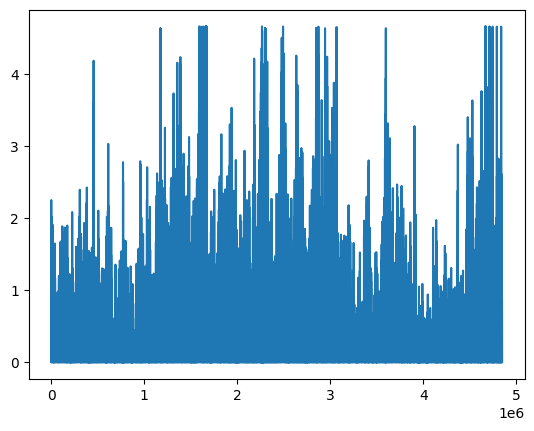

In [3]:
plt.plot(train_emg[:,1])
#plt.plot(label*0.0001)
col_names = ['Electrode 1', 'Electrode 2', 'Electrode 3', 'Electrode 4', 'Electrode 5', 'Electrode 6', 'Electrode 7', 'Electrode 8', 'Electrode 9', 'Electrode 10','label']
df = pd.DataFrame(train_emg, columns=col_names)
display(df)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df.iloc[:,0:10])
df.iloc[:,0:10]=scaler.transform(df.iloc[:,0:10])
pd.options.display.float_format = "{:,.5f}".format
display (df.head(5))
emg=train_emg[:,:10]
label_train=train_emg[:,10]
label_t=label_train-1
label=np.array(label_t).reshape(len(label_t),1)
print(emg.shape)
print(emg[1:10,])
print(label_train.shape)
print(label[1:10])



In [4]:
# from feature_utils import *  
# import math

# featureData=[]
# featureLabel = []
# classes = 52
# timeWindow = 20
# strideWindow = 20

# for i in range(classes):
#     index = [];
#     for j in range(label.shape[0]):
#         if(label[j,:]==i):
#             index.append(j)
#     iemg = emg[index,:]
#     length = math.floor((iemg.shape[0]-timeWindow)/strideWindow)
#     print("class ",i, ",number of sample: ",iemg.shape[0],length)
    
#     for j in range(length):
#         rms = featureRMS(iemg[strideWindow*j:strideWindow*j+timeWindow,:])
#         mav = featureMAV(iemg[strideWindow*j:strideWindow*j+timeWindow,:])
#         wl  = featureWL( iemg[strideWindow*j:strideWindow*j+timeWindow,:])
#         zc  = featureZC( iemg[strideWindow*j:strideWindow*j+timeWindow,:])
#         ssc = featureSSC(iemg[strideWindow*j:strideWindow*j+timeWindow,:])
        
#         featureStack = np.hstack((rms,mav,wl,zc,ssc))
        
#         featureData.append(featureStack)
#         featureLabel.append(i)
# featureData = np.array(featureData)

# print(featureData.shape)
# print(len(featureLabel))
# print(featureData[:,1])


In [5]:
import numpy as np
print("Shape of the array = ",np.shape(label))
print("Array Dimension = ",len(label.shape))
# label=label_train.reshape(4845568,1)
# print("Array Dimension = ",len(label.shape))

Shape of the array =  (4845568, 1)
Array Dimension =  2


class  0  number of sample:  93184 185
class  1  number of sample:  93184 185
class  2  number of sample:  93184 185
class  3  number of sample:  93184 185
class  4  number of sample:  93184 185
class  5  number of sample:  93184 185
class  6  number of sample:  93184 185
class  7  number of sample:  93184 185
class  8  number of sample:  93184 185
class  9  number of sample:  93184 185
class  10  number of sample:  93184 185
class  11  number of sample:  93184 185
class  12  number of sample:  93184 185
class  13  number of sample:  93184 185
class  14  number of sample:  93184 185
class  15  number of sample:  93184 185
class  16  number of sample:  93184 185
class  17  number of sample:  93184 185
class  18  number of sample:  93184 185
class  19  number of sample:  93184 185
class  20  number of sample:  93184 185
class  21  number of sample:  93184 185
class  22  number of sample:  93184 185
class  23  number of sample:  93184 185
class  24  number of sample:  93184 185
class  25 

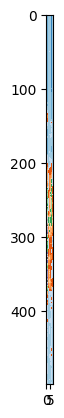

In [6]:
from feature_utils import *  
import math
imageData=[]
imageLabel=[]
imageLength=500
featureData=[]
featureLabel = []
classes = 52
timeWindow = 20
strideWindow = 20

for i in range(classes):
    index = [];
    for j in range(label.shape[0]):
        if(label[j,:]==i):
            index.append(j)
            
    iemg = emg[index,:]
    length = math.floor((iemg.shape[0]-imageLength)/imageLength)
    print("class ",i," number of sample: ",iemg.shape[0],length)

           
    for j in range(length):
        subImage = iemg[imageLength*j:imageLength*(j+1),:]
        
        N=25
        for k in range(25):
            rms = featureRMS(subImage[strideWindow*k:strideWindow*k+timeWindow,:])
            mav = featureMAV(subImage[strideWindow*k:strideWindow*k+timeWindow,:])
            wl  = featureWL( subImage[strideWindow*k:strideWindow*k+timeWindow,:])
            zc  = featureZC( subImage[strideWindow*k:strideWindow*k+timeWindow,:])
            ssc = featureSSC(subImage[strideWindow*k:strideWindow*k+timeWindow,:])
        
            featureStack = np.hstack((rms,mav,wl,zc,ssc))
            featureData.append(featureStack)
            featureLabel.append(i)
                                 
        imageData.append(subImage)
        imageLabel.append(i)
        
imageData = np.array(imageData)
print(imageData.shape)
print(len(imageLabel))
print (imageData[1])
#print (imageLabel)
plt.imshow(imageData[0],cmap='tab20c',interpolation='none')


In [7]:

featureData = np.array(featureData)
f_Label=np.array(featureLabel)
print(featureData.shape)
print(f_Label.shape)
my_array_2d = f_Label[:, np.newaxis]
print(my_array_2d )
print(my_array_2d.shape)

(240500, 50)
(240500,)
[[ 0]
 [ 0]
 [ 0]
 ...
 [51]
 [51]
 [51]]
(240500, 1)


In [8]:
classes = 52
for i in range(classes):
    index = [];
    for j in range(my_array_2d.shape[0]):
        if(my_array_2d[j,:]==i):
            index.append(j)

    f =featureData[index,:]
    
    print("class ",i," number of sample: ",f .shape[0],length)
    

class  0  number of sample:  4625 185
class  1  number of sample:  4625 185
class  2  number of sample:  4625 185
class  3  number of sample:  4625 185
class  4  number of sample:  4625 185
class  5  number of sample:  4625 185
class  6  number of sample:  4625 185
class  7  number of sample:  4625 185
class  8  number of sample:  4625 185
class  9  number of sample:  4625 185
class  10  number of sample:  4625 185
class  11  number of sample:  4625 185
class  12  number of sample:  4625 185
class  13  number of sample:  4625 185
class  14  number of sample:  4625 185
class  15  number of sample:  4625 185
class  16  number of sample:  4625 185
class  17  number of sample:  4625 185
class  18  number of sample:  4625 185
class  19  number of sample:  4625 185
class  20  number of sample:  4625 185
class  21  number of sample:  4625 185
class  22  number of sample:  4625 185
class  23  number of sample:  4625 185
class  24  number of sample:  4625 185
class  25  number of sample:  4625 

In [9]:
reshaped_featuredata = featureData.reshape(9620, 25, 50)
print (reshaped_featuredata.shape)
reshaped_featurelabels =f_Label.reshape(9620, 25)
print (reshaped_featurelabels.shape)
print(reshaped_featurelabels[2000,:])
num_unique_featurevalues = np.unique(reshaped_featurelabels[:, 0]).shape[0]
print(num_unique_featurevalues)
selected_featurelabels = reshaped_featurelabels[:, 5]
feature_labels= selected_featurelabels[:, np.newaxis]
print (feature_labels)



are_corresponding = np.array_equal(feature_labels, f_Label[::25].reshape(-1, 1))
if are_corresponding:
    print("The reshaped EMG data and label data correspond correctly.")
else:
    print("The reshaped EMG data and label data do not correspond correctly.")
# are_corresponding = np.array_equal(feature_labels,imageLabel)
# if are_corresponding:
#     print("The reshaped EMG data and label data correspond correctly.")
# else:
#     print("The reshaped EMG data and label data do not correspond correctly.")    
# print("Selected Labels:")
# print(feature_labels[:90])  # Print the first 10 labels
# print("Original Labels:")
# print(imageLabel[:90])  # Print every 25th label from the original data
    

(9620, 25, 50)
(9620, 25)
[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10]
52
[[ 0]
 [ 0]
 [ 0]
 ...
 [51]
 [51]
 [51]]
The reshaped EMG data and label data correspond correctly.


In [10]:
# FeatureData= np.array(featureData[0:240500,:])
# n_steps, n_length = 25, 20
# n_depth=50
# featureData  = FeatureData .reshape(9620, n_steps,FeatureData .shape[-1])
# print('featureData shape: ', featureData.shape)
# label = np.array(featureLabel[0:240500])
# print(label.shape)
# # x_test = X_test.reshape(X_test.shape[0], n_steps, n_length,n_depth)
# # print('x_test shape: ', x_test.shape)
# n_outputs = Y_train.shape[1]
# print('n_outputs',n_outputs)
# LABELS=[]
# for i in range(1,n_outputs+1,1):
#   LABELS.append (i)
# print(LABELS)

In [11]:
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(df.iloc[:,0:10])
# df.iloc[:,0:10]=scaler.transform(df.iloc[:,0:10])
# pd.options.display.float_format = "{:,.5f}".format
# df.head(5)

# reshaped_featuredata  huafen

In [12]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

# 随机打乱数据和标签
N = reshaped_featuredata.shape[0]
index = np.random.permutation(N)
featuredata = reshaped_featuredata[index,:,:]
data  = imageData[index,:,:]
label = np.array(imageLabel)[index]
featurelabel = np.array(feature_labels)[index]

# 对数据升维,标签one-hot
featuredata = np.expand_dims(featuredata , axis=2)
featurelabel= convert_to_one_hot(featurelabel,52).T

data  = np.expand_dims(data, axis=2)
label = convert_to_one_hot(label,52).T

# 划分数据集
N = featuredata.shape[0]
num_train = round(N*0.8)
X_train_feature = featuredata[0:num_train,:,:]
Y_train_feature = featurelabel[0:num_train,:]
X_test_feature  =featuredata[num_train:N,:,:]
Y_test_feature  = featurelabel[num_train:N,:]
X_train = data[0:num_train,:,:]
Y_train = label[0:num_train,:]
X_test  = data[num_train:N,:,:]
Y_test  = label[num_train:N,:]

print ("X_train_feature shape: " + str(X_train_feature.shape))
print ("Y_train_feature shape: " + str(Y_train_feature.shape))
print ("X_test_feature shape: " + str(X_test_feature.shape))
print ("Y_test_feature shape: " + str(Y_test_feature.shape))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

X_train_feature shape: (7696, 25, 1, 50)
Y_train_feature shape: (7696, 52)
X_test_feature shape: (1924, 25, 1, 50)
Y_test_feature shape: (1924, 52)
X_train shape: (7696, 500, 1, 10)
Y_train shape: (7696, 52)
X_test shape: (1924, 500, 1, 10)
Y_test shape: (1924, 52)


In [13]:
n_steps, n_length = 25, 20
n_depth=10
x_train = X_train.reshape(X_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
x_test = X_test.reshape(X_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = Y_train.shape[1]
print('n_outputs',n_outputs)
LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

x_train shape:  (7696, 25, 20, 10)
x_test shape:  (1924, 25, 20, 10)
n_outputs 52
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [14]:
n_steps, n_length = 25, 5
n_depth=10
X_train_feature = X_train_feature.reshape(X_train.shape[0], n_steps, n_length,n_depth)
print('X_train_feature shape: ', X_train_feature.shape)
X_test_feature = X_test_feature.reshape(X_test.shape[0], n_steps, n_length,n_depth)
print('X_test_feature: ', X_test_feature.shape)
n_outputs = Y_train.shape[1]
print('n_outputs',n_outputs)
LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

X_train_feature shape:  (7696, 25, 5, 10)
X_test_feature:  (1924, 25, 5, 10)
n_outputs 52
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [15]:
Y= np.array(imageLabel)
reshaped_array = Y.reshape(-1, 1)

are_corresponding = np.array_equal(Y_train_feature, Y_train)
if are_corresponding:
    print("The reshaped EMG data and label data correspond correctly.")
else:
    print("The reshaped EMG data and label data do not correspond correctly.")
# print("Selected Labels:")
# print(feature_labels[:1500])  # Print the first 10 labels
# print("Original Labels:")
# print(Y[:1500]) # Prin    

The reshaped EMG data and label data correspond correctly.


In [16]:
def step_decay(epoch):
  initial_lrate = 1e-4
  drop = 0.1
  epochs_drop =70.0
  lrate = initial_lrate * tf.math.pow(drop,  
          tf.math.floor((1+epoch)/epochs_drop))
  return lrate
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)
verbose, epochs, batch_size = 0, 500, 64

In [17]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU,SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras import utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import Input, LocallyConnected1D
from tensorflow.keras.layers import SeparableConv1D, Bidirectional
from tensorflow.keras.layers import LocallyConnected2D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger,LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [18]:
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()


In [19]:
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Input
from keras.regularizers import l2
learning_rate = 0.001
# input_img = Input(shape = (25, 5, 10))
# tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
# tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
# tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
# tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)
# tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
# tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)
# output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)
# from keras.layers import Flatten, Dense
# output = Flatten()(output)
# out    = Dense(52, activation='softmax')(output)
# from keras.models import Model
# model = Model(inputs = input_img, outputs = out)
# # print model.summary()
# from keras.optimizers import SGD
# epochs = 25
# lrate = 0.01
# decay = lrate/epochs
# momentum = 0.9
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()
# history = LossHistory() # 创建一个history实例
# model.fit(x_train,Y_train, epochs=200, validation_data=(x_test, Y_test),batch_size=64,callbacks=[history])

# tower_1 =TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth))(input_input_feature )
# tower_2 =TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))(tower_1)
# tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(tower_2)

In [46]:
from tensorflow.keras.layers import Concatenate
learning_rate = 0.001
# input_feature = Input_feature(shape = (25, 5, 10))
feature_input = Input(shape=(25, 5, 10), name="feature_input")
raw_input = Input(shape=(25, 20, 10), name="raw_input")

feature_model = Sequential()

feature_model.add(TimeDistributed(Conv1D(filters=256,kernel_size=3, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
                           input_shape=(25, 5, 10)))
feature_model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# feature_model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=2)))
feature_model.add(TimeDistributed(Activation('relu')))
# feature_model.add(TimeDistributed(LSTM(50,return_sequences=True)))
# Raw_model.add(TimeDistributed(Dropout(0.3)))
feature_model.add(TimeDistributed(Conv1D(filters=256,kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
feature_model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
feature_model.add(TimeDistributed(Activation('relu')))
feature_model.add(TimeDistributed(Dropout(0.2093)))
# feature_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# feature_model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# feature_model.add(TimeDistributed(Activation('tanh')))
feature_model.add(TimeDistributed(Dropout(0.7)))
# feature_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# feature_model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# feature_model.add(TimeDistributed(Activation('tanh')))
# feature_model.add(TimeDistributed(Dropout(0.2093)))
# feature_model.add(TimeDistributed(Activation('relu')))
feature_model.add(TimeDistributed(Flatten()))
feature_output = feature_model(feature_input)

Raw_model = Sequential()
Raw_model.add(TimeDistributed(Conv1D(filters=256, kernel_size=3, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
                           input_shape=(25, 20, 10)))
Raw_model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# Raw_model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
Raw_model.add(TimeDistributed(Activation('relu')))
# Raw_model.add(TimeDistributed(Dropout(0.5)))
Raw_model.add(TimeDistributed(LSTM(200,return_sequences=True)))
Raw_model.add(TimeDistributed(Conv1D(filters=256,kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
Raw_model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
Raw_model.add(TimeDistributed(Activation('relu')))
Raw_model.add(TimeDistributed(Dropout(0.2093)))
# Raw_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# Raw_model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# Raw_model.add(TimeDistributed(Activation('relu')))
# Raw_model.add(TimeDistributed(Dropout(0.7)))
# Raw_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# Raw_model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# Raw_model.add(TimeDistributed(Activation('relu')))
# Raw_model.add(TimeDistributed(Dropout(0.5)))
# Raw_model.add(TimeDistributed(Activation('relu')))
Raw_model.add(TimeDistributed(Flatten()))
Raw_output = Raw_model(raw_input)
concatenated_output = Concatenate(axis=2)([feature_output, Raw_output])
combined_model= Sequential()
# model.add(Flatten())
X=Bidirectional(LSTM(200,return_sequences=True))(concatenated_output )
X=Dropout(0.3)(X)
X=Bidirectional(LSTM(200,return_sequences=True))(X)
X=Dropout(0.3)(X)
# model.add(Bidirectional(LSTM(100,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(SimpleRNN(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(SimpleRNN(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(SimpleRNN(200)))
# model.add(Dropout(0.3))
X=Flatten()(X)
X=Dense(512, activation='relu',kernel_regularizer=l2(0.01))(X)#修改参数成tanh
X=Dropout(0.3)(X)
X=BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None)(X)
# X=Dense(256, activation='tanh')(X)
X=Dense(52, activation='softmax')(X)
# combined_model = combined_model(inputs=[feature_input ,raw_input ],outputs=X)
combined_model = Model(inputs=[feature_input ,raw_input ], outputs=X)
print(combined_model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 feature_input (InputLayer)  [(None, 25, 5, 10)]          0         []                            
                                                                                                  
 raw_input (InputLayer)      [(None, 25, 20, 10)]         0         []                            
                                                                                                  
 sequential_6 (Sequential)   (None, 25, 512)              206848    ['feature_input[0][0]']       
                                                                                                  
 sequential_7 (Sequential)   (None, 25, 1280)             529440    ['raw_input[0][0]']           
                                                                                            

In [47]:
adam=optimizers.Adam(lr=lrate, beta_1=0.9, beta_2=0.999, amsgrad=False)
checkpoint_filepath = 'E:/jupyter notebook/jupyter notebook/me/vlog.12.5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
combined_model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(combined_model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 feature_input (InputLayer)  [(None, 25, 5, 10)]          0         []                            
                                                                                                  
 raw_input (InputLayer)      [(None, 25, 20, 10)]         0         []                            
                                                                                                  
 sequential_6 (Sequential)   (None, 25, 512)              206848    ['feature_input[0][0]']       
                                                                                                  
 sequential_7 (Sequential)   (None, 25, 1280)             529440    ['raw_input[0][0]']           
                                                                                            

In [48]:
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()


In [49]:
# tf.keras.utils.plot_model(model, to_file='D:/jupyter notebook/Nina dataNinaweb/data1/s1-27/CNN25X20/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [50]:
are_corresponding = np.array_equal(Y_train_feature, Y_train)
if are_corresponding:
    print("The reshaped EMG data and label data correspond correctly.")
else:
    print("The reshaped EMG data and label data do not correspond correctly.")

The reshaped EMG data and label data correspond correctly.


In [51]:
csv_logger = CSVLogger('E:/jupyter notebook/jupyter notebook/me/vlog.10.5', append=True, separator=';')
history = combined_model.fit({'feature_input': X_train_feature, 'raw_input':x_train },Y_train , epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate,early],validation_data=({'feature_input':X_test_feature, 'raw_input':x_test}, Y_test), verbose=1)
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
# csv_logger = CSVLogger('D:/jupyter notebook/Nina dataNinaweb/data1/s1-27/9.29', append=True, separator=';')
# history = combined_model.fit({'feature_inpcut': X_train_feature, 'raw_input':x_train },Y_train ,epochs=epochs,batch_size=batch_size,validation_data=({'feature_input':X_test_feature, 'raw_input':x_test}, Y_test), verbose=1)#,callbacks=[csv_logger,checkpoint_callback,lrate,early];
# best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
# print('epoch_number',best_index+1)

Epoch 1/500
121/121 [==============================] - ETA: 0s - loss: 15.1570 - accuracy: 0.0890
Epoch 1: val_accuracy improved from -inf to 0.23025, saving model to E:/jupyter notebook/jupyter notebook/me\vlog.12.5
121/121 [==============================] - 199s 2s/step - loss: 15.1570 - accuracy: 0.0890 - val_loss: 13.7660 - val_accuracy: 0.2302 - lr: 1.0000e-04
Epoch 2/500
121/121 [==============================] - ETA: 0s - loss: 13.5550 - accuracy: 0.1965
Epoch 2: val_accuracy improved from 0.23025 to 0.32225, saving model to E:/jupyter notebook/jupyter notebook/me\vlog.12.5
121/121 [==============================] - 190s 2s/step - loss: 13.5550 - accuracy: 0.1965 - val_loss: 12.4623 - val_accuracy: 0.3222 - lr: 1.0000e-04
Epoch 3/500
121/121 [==============================] - ETA: 0s - loss: 12.3295 - accuracy: 0.2678
Epoch 3: val_accuracy improved from 0.32225 to 0.39449, saving model to E:/jupyter notebook/jupyter notebook/me\vlog.12.5
121/121 [==============================] 

Epoch 24/500
121/121 [==============================] - ETA: 0s - loss: 2.8128 - accuracy: 0.9276
Epoch 24: val_accuracy improved from 0.81653 to 0.82744, saving model to E:/jupyter notebook/jupyter notebook/me\vlog.12.5
121/121 [==============================] - 188s 2s/step - loss: 2.8128 - accuracy: 0.9276 - val_loss: 3.0704 - val_accuracy: 0.8274 - lr: 1.0000e-04
Epoch 25/500
121/121 [==============================] - ETA: 0s - loss: 2.7038 - accuracy: 0.9318
Epoch 25: val_accuracy did not improve from 0.82744
121/121 [==============================] - 186s 2s/step - loss: 2.7038 - accuracy: 0.9318 - val_loss: 2.9987 - val_accuracy: 0.8233 - lr: 1.0000e-04
Epoch 26/500
121/121 [==============================] - ETA: 0s - loss: 2.6003 - accuracy: 0.9339
Epoch 26: val_accuracy did not improve from 0.82744
121/121 [==============================] - 187s 2s/step - loss: 2.6003 - accuracy: 0.9339 - val_loss: 2.9164 - val_accuracy: 0.8264 - lr: 1.0000e-04
Epoch 27/500
121/121 [==========

121/121 [==============================] - 189s 2s/step - loss: 1.6977 - accuracy: 0.9683 - val_loss: 2.1719 - val_accuracy: 0.8384 - lr: 1.0000e-04
Epoch 51/500
121/121 [==============================] - ETA: 0s - loss: 1.6754 - accuracy: 0.9695
Epoch 51: val_accuracy did not improve from 0.84511
121/121 [==============================] - 187s 2s/step - loss: 1.6754 - accuracy: 0.9695 - val_loss: 2.1686 - val_accuracy: 0.8404 - lr: 1.0000e-04
Epoch 52/500
121/121 [==============================] - ETA: 0s - loss: 1.6459 - accuracy: 0.9726
Epoch 52: val_accuracy did not improve from 0.84511
121/121 [==============================] - 191s 2s/step - loss: 1.6459 - accuracy: 0.9726 - val_loss: 2.1496 - val_accuracy: 0.8384 - lr: 1.0000e-04
Epoch 53/500
121/121 [==============================] - ETA: 0s - loss: 1.5962 - accuracy: 0.9800
Epoch 53: val_accuracy did not improve from 0.84511
121/121 [==============================] - 188s 2s/step - loss: 1.5962 - accuracy: 0.9800 - val_loss: 2

121/121 [==============================] - ETA: 0s - loss: 1.2766 - accuracy: 0.9973
Epoch 76: val_accuracy did not improve from 0.87994
121/121 [==============================] - 188s 2s/step - loss: 1.2766 - accuracy: 0.9973 - val_loss: 1.7516 - val_accuracy: 0.8773 - lr: 1.0000e-05
Epoch 77/500
121/121 [==============================] - ETA: 0s - loss: 1.2667 - accuracy: 0.9984
Epoch 77: val_accuracy did not improve from 0.87994
121/121 [==============================] - 188s 2s/step - loss: 1.2667 - accuracy: 0.9984 - val_loss: 1.7458 - val_accuracy: 0.8758 - lr: 1.0000e-05
Epoch 78/500
121/121 [==============================] - ETA: 0s - loss: 1.2590 - accuracy: 0.9987
Epoch 78: val_accuracy did not improve from 0.87994
121/121 [==============================] - 189s 2s/step - loss: 1.2590 - accuracy: 0.9987 - val_loss: 1.7368 - val_accuracy: 0.8789 - lr: 1.0000e-05
Epoch 79/500
121/121 [==============================] - ETA: 0s - loss: 1.2510 - accuracy: 0.9983
Epoch 79: val_accu

121/121 [==============================] - ETA: 0s - loss: 1.0836 - accuracy: 0.9990
Epoch 102: val_accuracy did not improve from 0.88825
121/121 [==============================] - 187s 2s/step - loss: 1.0836 - accuracy: 0.9990 - val_loss: 1.5691 - val_accuracy: 0.8841 - lr: 1.0000e-05
Epoch 103/500
121/121 [==============================] - ETA: 0s - loss: 1.0767 - accuracy: 0.9994
Epoch 103: val_accuracy improved from 0.88825 to 0.88929, saving model to E:/jupyter notebook/jupyter notebook/me\vlog.12.5
121/121 [==============================] - 188s 2s/step - loss: 1.0767 - accuracy: 0.9994 - val_loss: 1.5553 - val_accuracy: 0.8893 - lr: 1.0000e-05
Epoch 104/500
121/121 [==============================] - ETA: 0s - loss: 1.0716 - accuracy: 0.9984
Epoch 104: val_accuracy did not improve from 0.88929
121/121 [==============================] - 187s 2s/step - loss: 1.0716 - accuracy: 0.9984 - val_loss: 1.5585 - val_accuracy: 0.8883 - lr: 1.0000e-05
Epoch 105/500
121/121 [=================

121/121 [==============================] - ETA: 0s - loss: 0.9792 - accuracy: 0.9996
Epoch 128: val_accuracy did not improve from 0.89501
121/121 [==============================] - 186s 2s/step - loss: 0.9792 - accuracy: 0.9996 - val_loss: 1.4672 - val_accuracy: 0.8940 - lr: 1.0000e-05
Epoch 129/500
121/121 [==============================] - ETA: 0s - loss: 0.9754 - accuracy: 0.9992
Epoch 129: val_accuracy improved from 0.89501 to 0.89657, saving model to E:/jupyter notebook/jupyter notebook/me\vlog.12.5
121/121 [==============================] - 188s 2s/step - loss: 0.9754 - accuracy: 0.9992 - val_loss: 1.4631 - val_accuracy: 0.8966 - lr: 1.0000e-05
Epoch 130/500
121/121 [==============================] - ETA: 0s - loss: 0.9739 - accuracy: 0.9988
Epoch 130: val_accuracy did not improve from 0.89657
121/121 [==============================] - 186s 2s/step - loss: 0.9739 - accuracy: 0.9988 - val_loss: 1.4618 - val_accuracy: 0.8940 - lr: 1.0000e-05
Epoch 131/500
121/121 [=================

121/121 [==============================] - ETA: 0s - loss: 0.9401 - accuracy: 0.9997
Epoch 155: val_accuracy did not improve from 0.89657
121/121 [==============================] - 186s 2s/step - loss: 0.9401 - accuracy: 0.9997 - val_loss: 1.4272 - val_accuracy: 0.8872 - lr: 1.0000e-06
Epoch 156/500
121/121 [==============================] - ETA: 0s - loss: 0.9399 - accuracy: 0.9997
Epoch 156: val_accuracy did not improve from 0.89657
121/121 [==============================] - 187s 2s/step - loss: 0.9399 - accuracy: 0.9997 - val_loss: 1.4294 - val_accuracy: 0.8872 - lr: 1.0000e-06
Epoch 157/500
121/121 [==============================] - ETA: 0s - loss: 0.9399 - accuracy: 0.9997
Epoch 157: val_accuracy did not improve from 0.89657
121/121 [==============================] - 187s 2s/step - loss: 0.9399 - accuracy: 0.9997 - val_loss: 1.4253 - val_accuracy: 0.8909 - lr: 1.0000e-06
Epoch 158/500
121/121 [==============================] - ETA: 0s - loss: 0.9399 - accuracy: 0.9992
Epoch 158: v

121/121 [==============================] - ETA: 0s - loss: 0.9289 - accuracy: 0.9995
Epoch 182: val_accuracy did not improve from 0.89657
121/121 [==============================] - 188s 2s/step - loss: 0.9289 - accuracy: 0.9995 - val_loss: 1.4101 - val_accuracy: 0.8919 - lr: 1.0000e-06
Epoch 183/500
121/121 [==============================] - ETA: 0s - loss: 0.9277 - accuracy: 0.9999
Epoch 183: val_accuracy did not improve from 0.89657
121/121 [==============================] - 187s 2s/step - loss: 0.9277 - accuracy: 0.9999 - val_loss: 1.4200 - val_accuracy: 0.8888 - lr: 1.0000e-06
Epoch 184/500
121/121 [==============================] - ETA: 0s - loss: 0.9272 - accuracy: 0.9999
Epoch 184: val_accuracy did not improve from 0.89657
121/121 [==============================] - 188s 2s/step - loss: 0.9272 - accuracy: 0.9999 - val_loss: 1.4154 - val_accuracy: 0.8883 - lr: 1.0000e-06
Epoch 185/500
121/121 [==============================] - ETA: 0s - loss: 0.9265 - accuracy: 1.0000
Epoch 185: v

121/121 [==============================] - ETA: 0s - loss: 0.9155 - accuracy: 0.9997
Epoch 209: val_accuracy did not improve from 0.89657
121/121 [==============================] - 188s 2s/step - loss: 0.9155 - accuracy: 0.9997 - val_loss: 1.4011 - val_accuracy: 0.8935 - lr: 1.0000e-06
Epoch 210/500
121/121 [==============================] - ETA: 0s - loss: 0.9149 - accuracy: 0.9999
Epoch 210: val_accuracy did not improve from 0.89657
121/121 [==============================] - 188s 2s/step - loss: 0.9149 - accuracy: 0.9999 - val_loss: 1.3977 - val_accuracy: 0.8955 - lr: 1.0000e-07
Epoch 211/500
121/121 [==============================] - ETA: 0s - loss: 0.9146 - accuracy: 1.0000
Epoch 211: val_accuracy did not improve from 0.89657
121/121 [==============================] - 188s 2s/step - loss: 0.9146 - accuracy: 1.0000 - val_loss: 1.3955 - val_accuracy: 0.8909 - lr: 1.0000e-07
Epoch 212/500
121/121 [==============================] - ETA: 0s - loss: 0.9149 - accuracy: 0.9997
Epoch 212: v

121/121 [==============================] - ETA: 0s - loss: 0.9136 - accuracy: 1.0000
Epoch 236: val_accuracy did not improve from 0.89657
121/121 [==============================] - 188s 2s/step - loss: 0.9136 - accuracy: 1.0000 - val_loss: 1.3985 - val_accuracy: 0.8935 - lr: 1.0000e-07
Epoch 237/500
121/121 [==============================] - ETA: 0s - loss: 0.9137 - accuracy: 0.9997
Epoch 237: val_accuracy did not improve from 0.89657
121/121 [==============================] - 187s 2s/step - loss: 0.9137 - accuracy: 0.9997 - val_loss: 1.3985 - val_accuracy: 0.8914 - lr: 1.0000e-07
Epoch 238/500
121/121 [==============================] - ETA: 0s - loss: 0.9133 - accuracy: 1.0000
Epoch 238: val_accuracy did not improve from 0.89657
121/121 [==============================] - 188s 2s/step - loss: 0.9133 - accuracy: 1.0000 - val_loss: 1.4013 - val_accuracy: 0.8924 - lr: 1.0000e-07
Epoch 239/500
121/121 [==============================] - ETA: 0s - loss: 0.9130 - accuracy: 0.9999
Epoch 239: v

121/121 [==============================] - ETA: 0s - loss: 0.9120 - accuracy: 1.0000
Epoch 263: val_accuracy did not improve from 0.89657
121/121 [==============================] - 192s 2s/step - loss: 0.9120 - accuracy: 1.0000 - val_loss: 1.3961 - val_accuracy: 0.8924 - lr: 1.0000e-07
Epoch 264/500
121/121 [==============================] - ETA: 0s - loss: 0.9119 - accuracy: 1.0000
Epoch 264: val_accuracy did not improve from 0.89657
121/121 [==============================] - 189s 2s/step - loss: 0.9119 - accuracy: 1.0000 - val_loss: 1.3961 - val_accuracy: 0.8929 - lr: 1.0000e-07
Epoch 265/500
121/121 [==============================] - ETA: 0s - loss: 0.9120 - accuracy: 0.9999
Epoch 265: val_accuracy did not improve from 0.89657
121/121 [==============================] - 189s 2s/step - loss: 0.9120 - accuracy: 0.9999 - val_loss: 1.3957 - val_accuracy: 0.8919 - lr: 1.0000e-07
Epoch 266/500
121/121 [==============================] - ETA: 0s - loss: 0.9119 - accuracy: 1.0000
Epoch 266: v

In [52]:
import datetime

In [53]:
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index])
# model.load_weights(checkpoint_filepath) 
print(datetime.datetime.now())
# _, testaccuracy = combined_model.evaluate(x_test,Y_test, batch_size=batch_size, verbose=1)
print(datetime.datetime.now())
# print('val_accuracy',val_accuracy)
# test_acc.append(testaccuracy)

train accuracy and validation accuracy 0.9992203712463379 0.8965696692466736
2023-12-09 00:10:05.550648
2023-12-09 00:10:05.550648


In [56]:
 combined_model.save('E:/jupyter notebook/10.5')

INFO:tensorflow:Assets written to: E:/jupyter notebook/10.5\assets


INFO:tensorflow:Assets written to: E:/jupyter notebook/10.5\assets


history loss
history accuracy
history val_loss
history val_accuracy
history lr


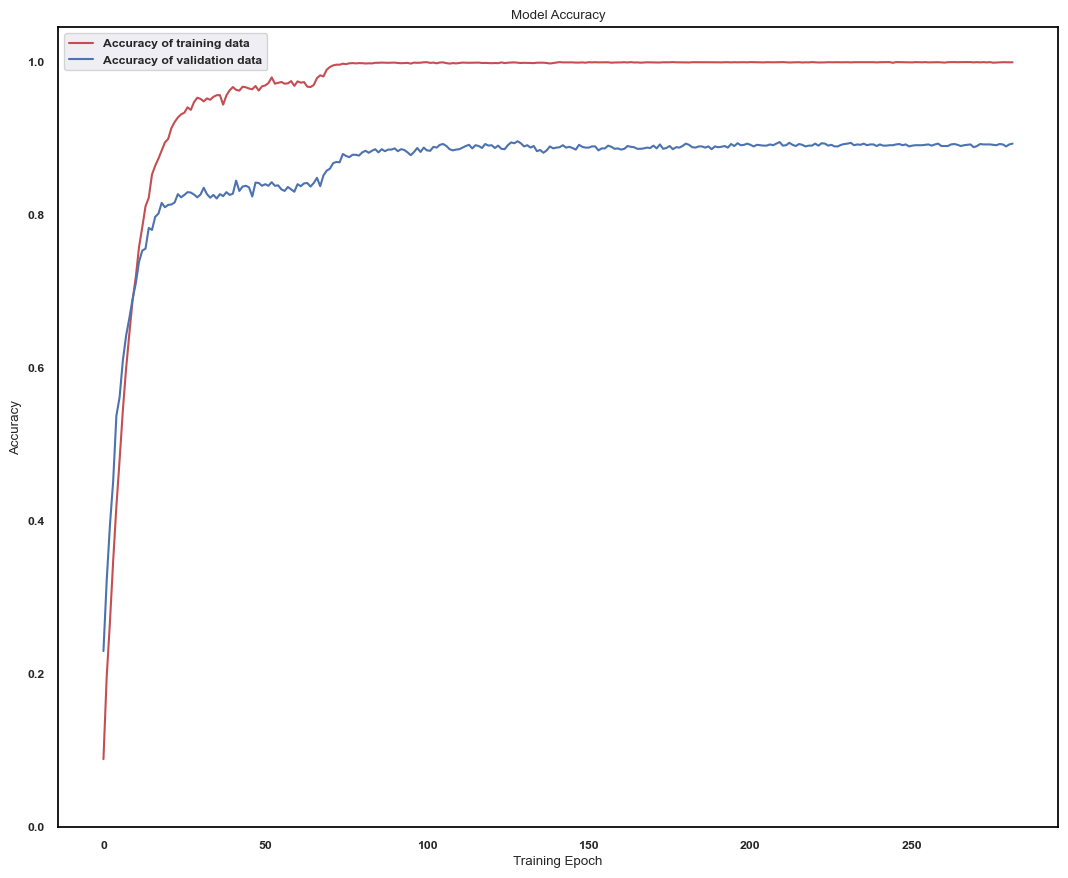

In [57]:
for i in history.history:
    print("history",i)
# facecolor='black'
DB1a=plt.figure(figsize=(10, 8),edgecolor='black')
# ax=figDB4.add_axes(("left", "bottom", "width", "height"))
ax= DB1a.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
# ax.spines["bottom"].set_linewidth(6)
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')

# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()


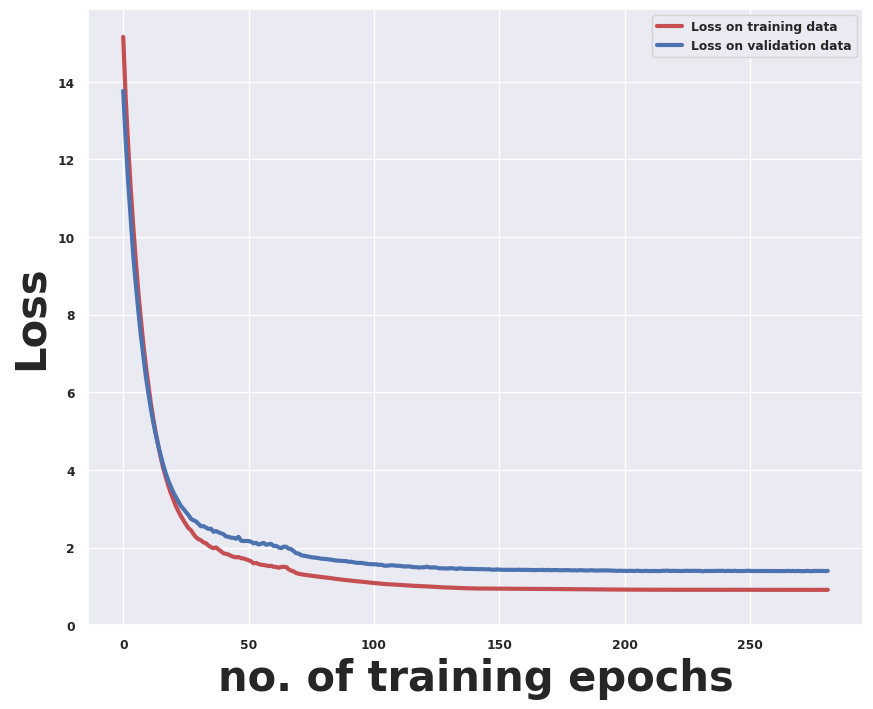

In [58]:
figDB1=plt.figure(figsize=(10, 8),edgecolor='black')
font = {'family' : 'Aril',
        'weight' : 'bold',
        'size'   : 28}

plt.rc('font', **font)

# SMALL_SIZE = 12
# MEDIUM_SIZE = 14
# BIGGER_SIZE = 18

# figBPR.suptitle('test title', fontsize=20)
#plt.rc('xlabel', fontsize=14, weight = 'bold')
#plt.rc('ylabel', fontsize=14, weight = 'bold')

# plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
# plt.rc('axes', labelsize=MEDIUM_SIZE )     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE, weight = 'bold')    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE )  # fontsize of the figure title

# ax=figDB1.add_axes(("left", "bottom", "width", "height"))
# ax= figDB1.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
ax.spines["top"].set_linewidth(3)
ax.spines["top"].set_linestyle("-")
ax.spines["bottom"].set_linewidth(3)
ax.spines["bottom"].set_linestyle("-")
ax.spines["left"].set_linewidth(3)
ax.spines["left"].set_linestyle("-")
ax.spines["right"].set_linewidth(3)
ax.spines["right"].set_linestyle("-")
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['loss'], 'r-', linewidth=3, label='Loss on training data')
plt.plot(history.history['val_loss'], 'b-', linewidth=3, label='Loss on validation data')
# plt.title('Loss curve for NinaPro DB1',fontsize=18, weight = 'bold')

plt.ylabel('Loss',fontsize=30, weight = 'bold')
plt.xlabel('no. of training epochs',fontsize=30, weight = 'bold')
# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

241/241 [==============================] - 63s 253ms/step


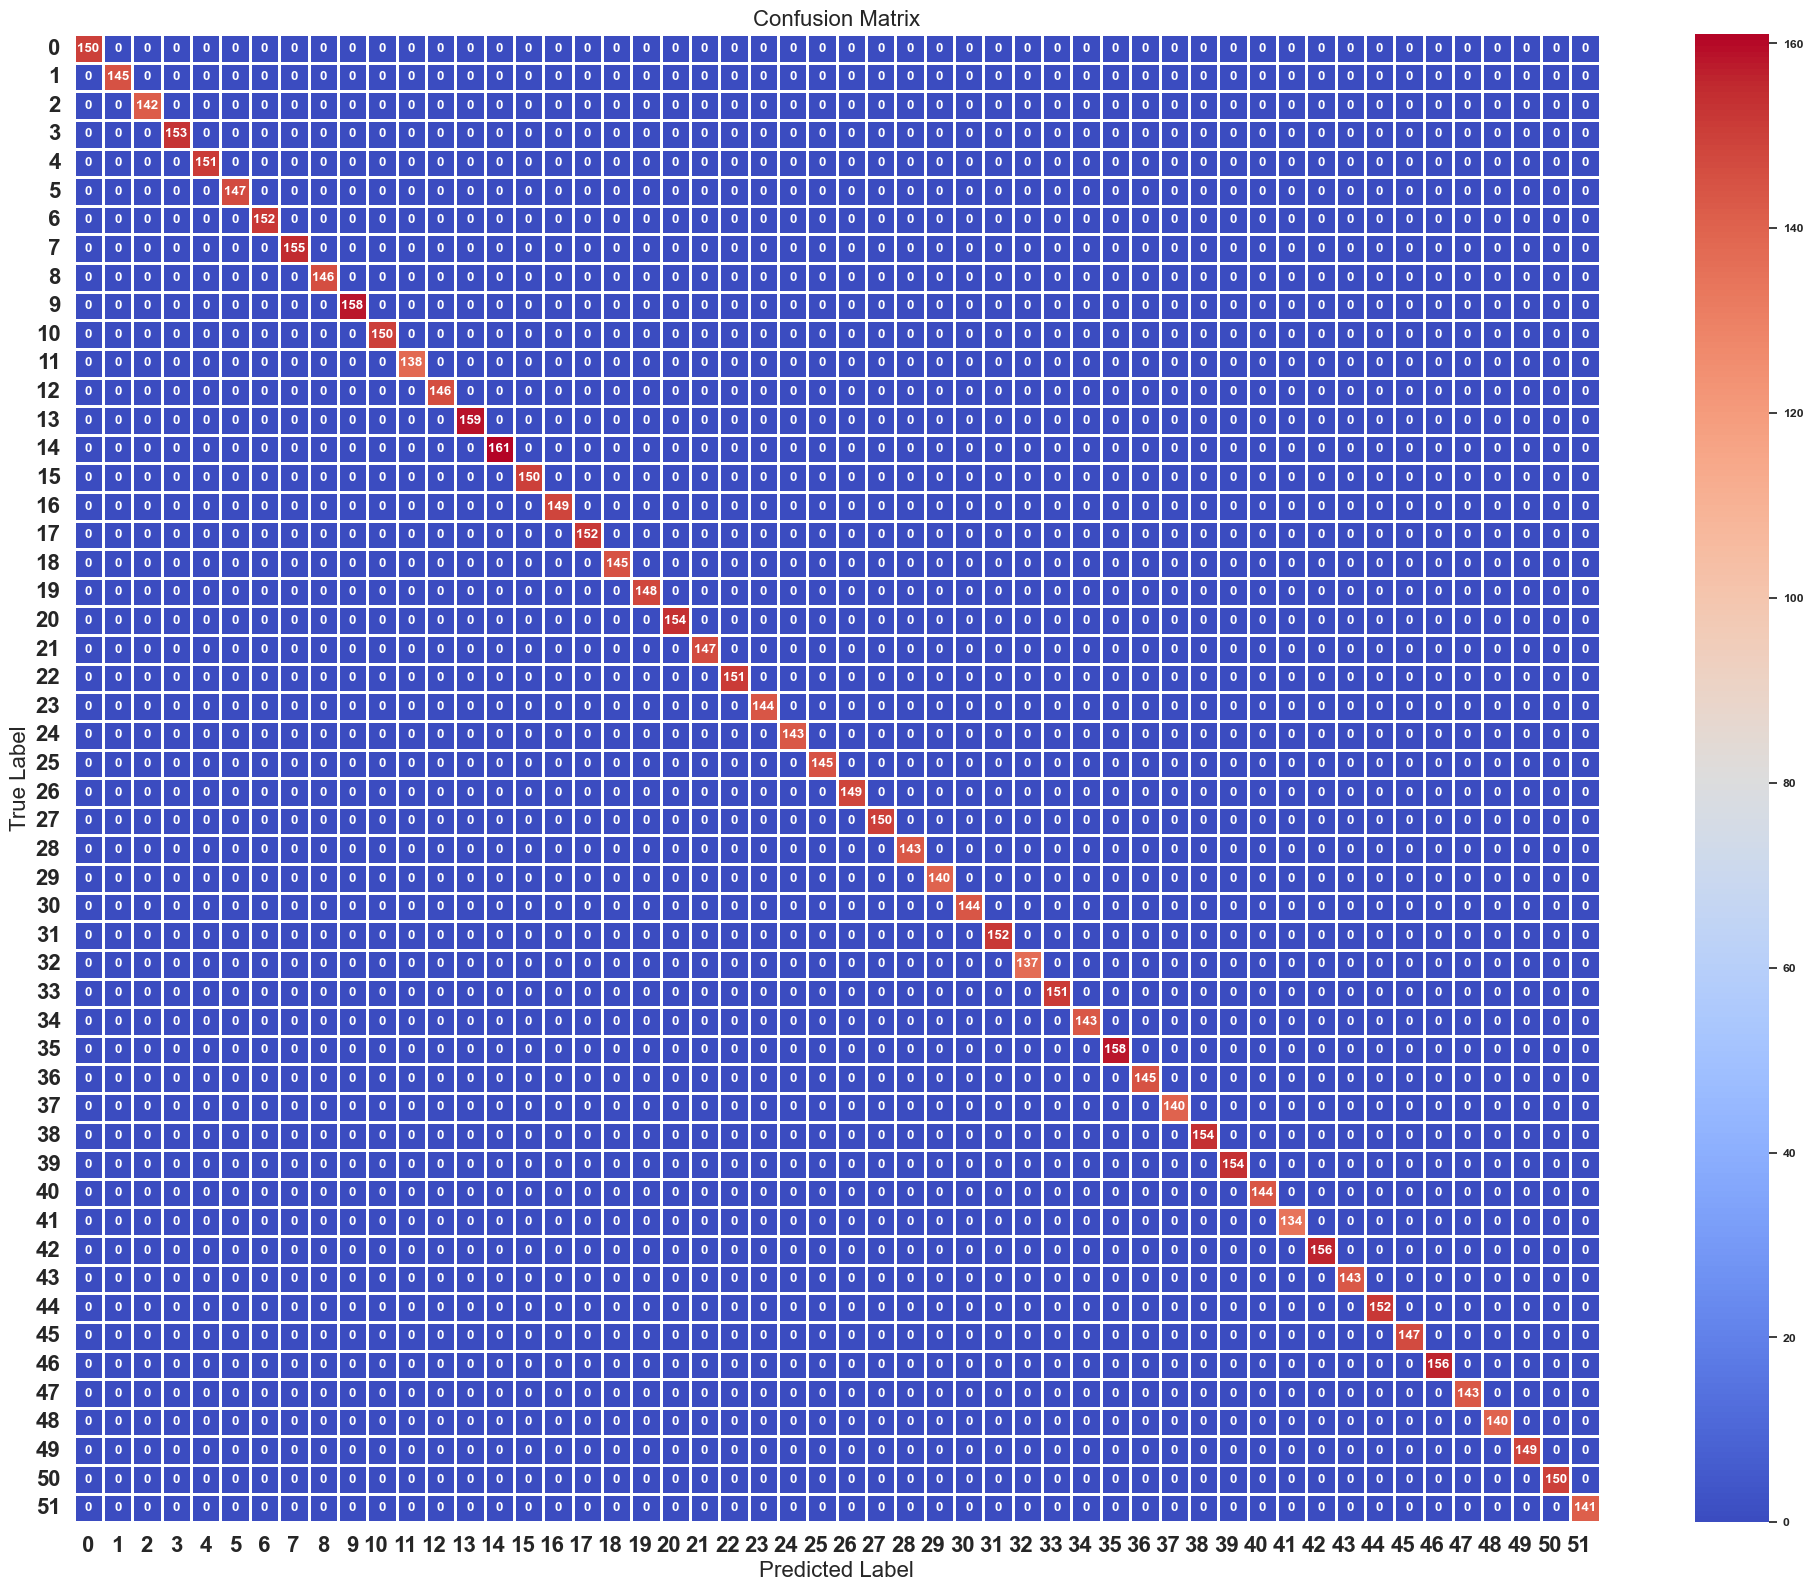

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       145
           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       153
           4       1.00      1.00      1.00       151
           5       1.00      1.00      1.00       147
           6       1.00      1.00      1.00       152
           7       1.00      1.00      1.00       155
           8       1.00      1.00      1.00       146
           9       1.00      1.00      1.00       158
          10       1.00      1.00      1.00       150
          11       1.00      1.00      1.00       138
          12       1.00      1.00      1.00       146
          13       1.00      1.00      1.00       159
          14       1.00      1.00      1.00       161
          15       1.00      1.00      1.00       150
          16       1.00      1.00      1.00

In [59]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to show confusion matrix
def show_confusion_matrix(validations, predictions, labels):
    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 16))
    sns.set(font_scale=0.8)
    # Adjust the figure size and layout
    plt.subplots_adjust(left=0.2, bottom=0.25)

    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=labels,
                yticklabels=labels,
                annot=True,
                fmt='d')

    # Rotate axis labels for better readability
    num_rows = len(labels)
    xtick_positions = np.arange(num_rows) + 0.7
    plt.xticks(xtick_positions,labels,rotation=0, ha='right')
    num_rows = len(labels)
    ytick_positions = np.arange(num_rows) + 0.5
    plt.yticks(ytick_positions, labels, rotation=0)

    # Adjust font size of x-axis and y-axis labels
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    

    plt.title('Confusion Matrix', fontsize=20)
    plt.ylabel('True Label', fontsize=20)
    plt.xlabel('Predicted Label', fontsize=20)

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    plt.show()

# Assuming Y_train is your true labels for the training set

# Transform true labels to binary indicator format
label_binarizer = LabelBinarizer()
Y_train_binary = label_binarizer.fit_transform(Y_train)

# Make predictions on the training set
y_pred_train = combined_model.predict({'feature_input': X_train_feature, 'raw_input': x_train})
max_y_pred_train = np.argmax(y_pred_train, axis=1)

# Display confusion matrix for the training set
show_confusion_matrix(np.argmax(Y_train_binary, axis=1), max_y_pred_train, labels=[' 0', '1', '2', '3', '4', '5', '6','7', '8','9','10','11','12','13','14','15','16','17','18','19','20','21','22',
                                                                                  '23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47',
                                                                                  '48','49','50','51',])

# Print classification report for the training set
print("Classification Report (Training Set):")
print(classification_report(np.argmax(Y_train_binary, axis=1), max_y_pred_train))


61/61 [==============================] - 16s 267ms/step


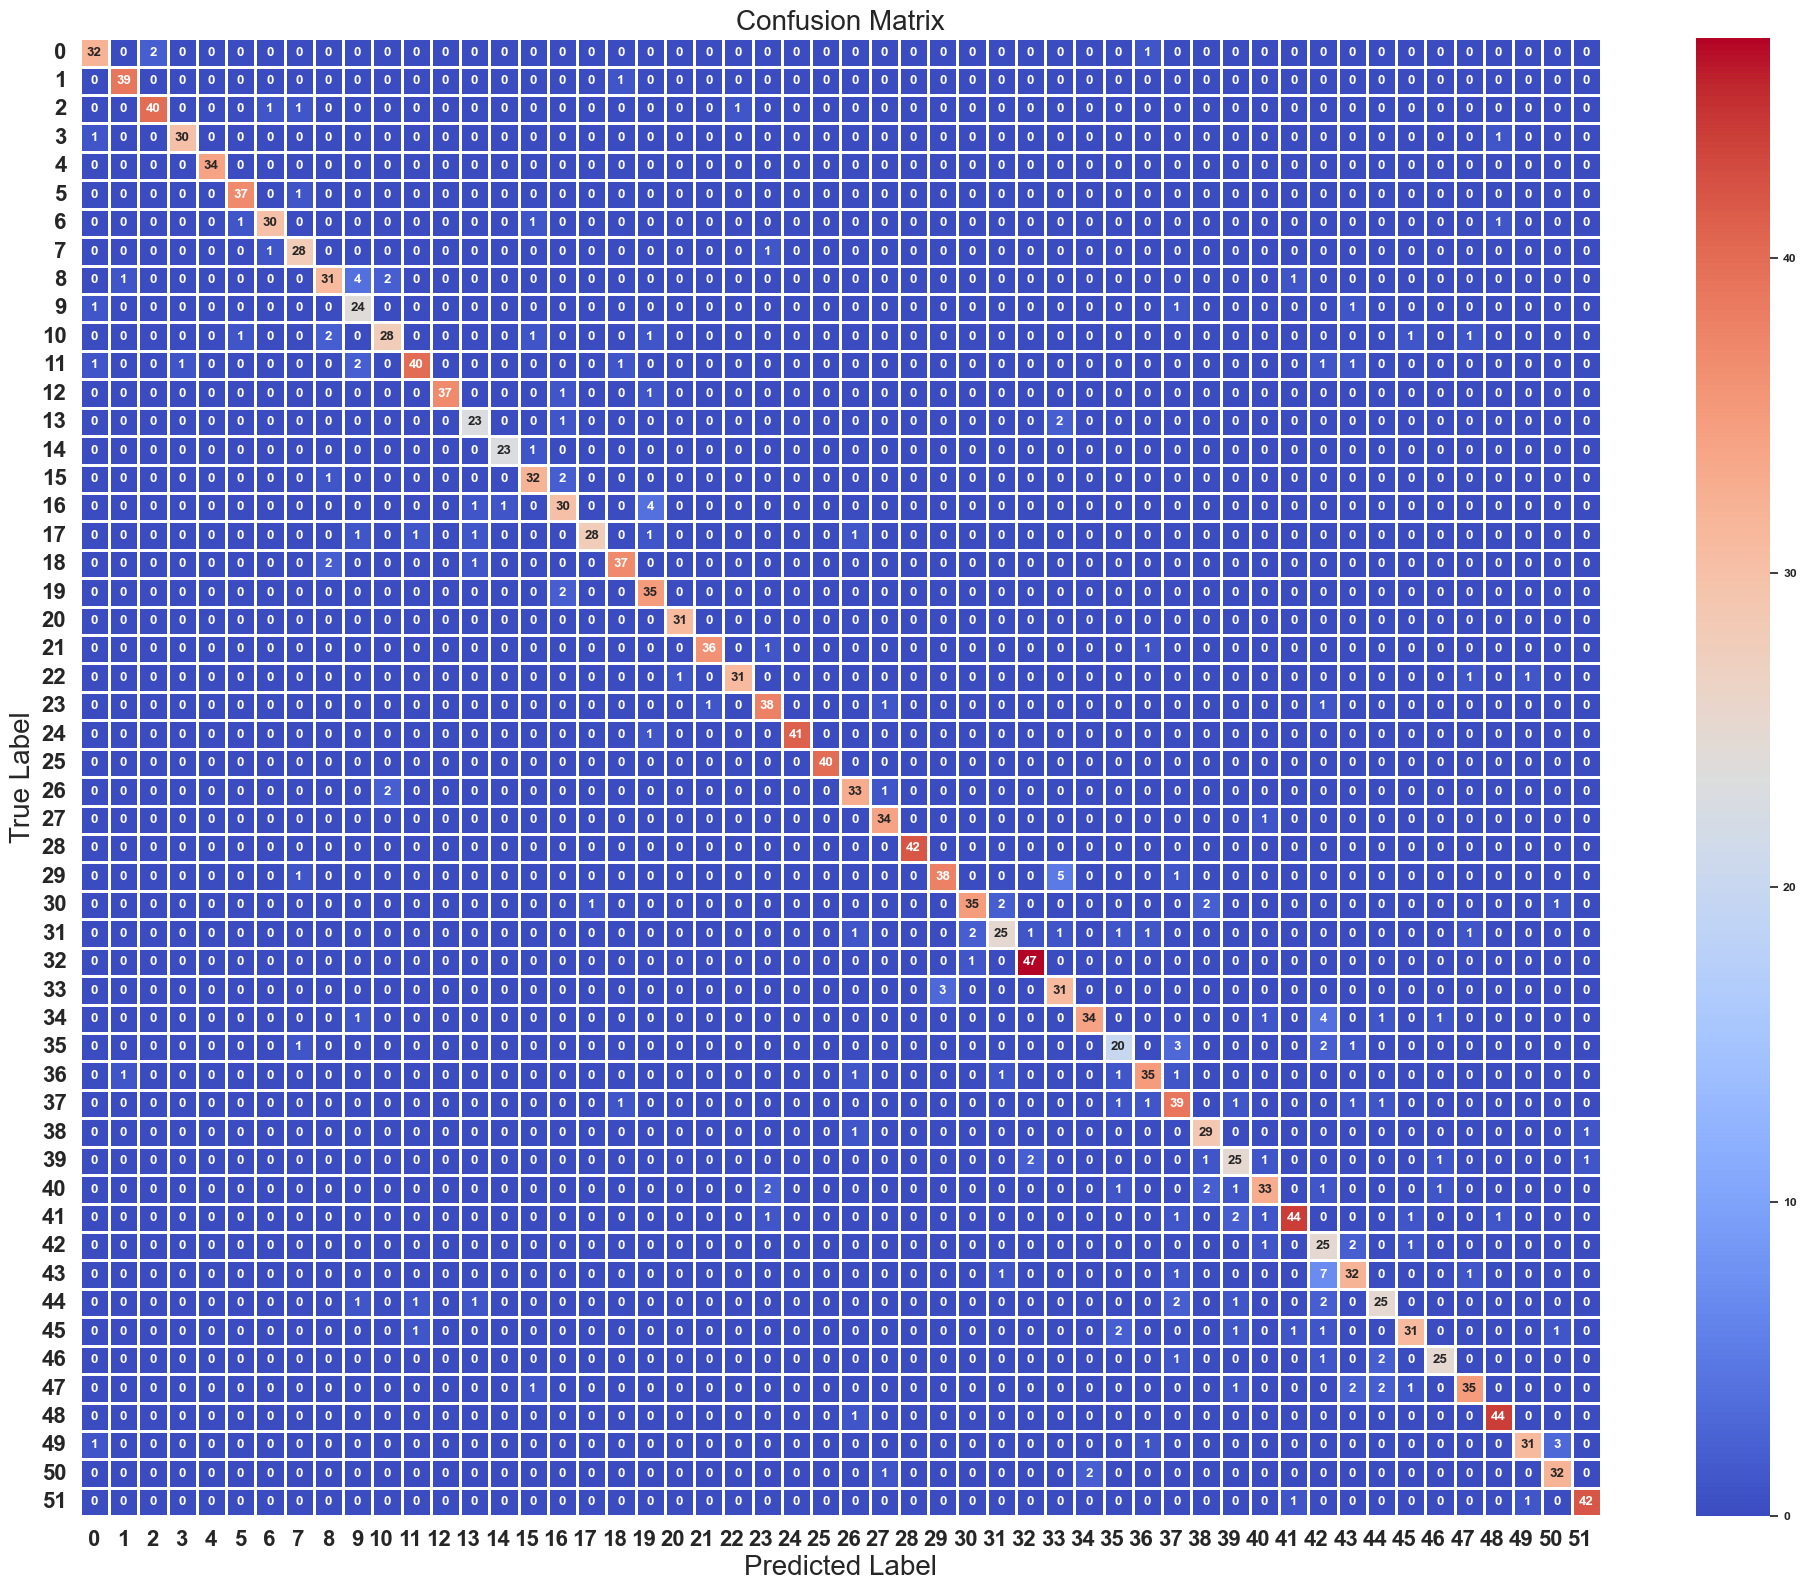

Classification Report (Vailding Set):
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.95      0.97      0.96        40
           2       0.95      0.93      0.94        43
           3       0.97      0.94      0.95        32
           4       1.00      1.00      1.00        34
           5       0.95      0.97      0.96        38
           6       0.94      0.91      0.92        33
           7       0.88      0.93      0.90        30
           8       0.86      0.79      0.83        39
           9       0.73      0.89      0.80        27
          10       0.88      0.80      0.84        35
          11       0.93      0.85      0.89        47
          12       1.00      0.95      0.97        39
          13       0.85      0.88      0.87        26
          14       0.96      0.96      0.96        24
          15       0.89      0.91      0.90        35
          16       0.83      0.83      0.83

In [60]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to show confusion matrix
def show_confusion_matrix(validations, predictions, labels):
    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 16))
    sns.set(font_scale=0.8)
    # Adjust the figure size and layout
    plt.subplots_adjust(left=0.2, bottom=0.25)

    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=labels,
                yticklabels=labels,
                annot=True,
                fmt='d')

    # Rotate axis labels for better readability
    num_rows = len(labels)
    xtick_positions = np.arange(num_rows) + 0.7
    plt.xticks(xtick_positions,labels,rotation=0, ha='right')
    num_rows = len(labels)
    ytick_positions = np.arange(num_rows) + 0.5
    plt.yticks(ytick_positions, labels, rotation=0)

    # Adjust font size of x-axis and y-axis labels
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    

    plt.title('Confusion Matrix', fontsize=20)
    plt.ylabel('True Label', fontsize=20)
    plt.xlabel('Predicted Label', fontsize=20)

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    plt.show()

# Assuming Y_train is your true labels for the training set

# Transform true labels to binary indicator format
label_binarizer = LabelBinarizer()
Y_test_binary = label_binarizer.fit_transform(Y_test)

# Make predictions on the training set
y_pred_test = combined_model.predict({'feature_input': X_test_feature, 'raw_input': x_test})
max_y_pred_test = np.argmax(y_pred_test, axis=1)

# Display confusion matrix for the training set
show_confusion_matrix(np.argmax(Y_test_binary, axis=1), max_y_pred_test, labels=[' 0', '1', '2', '3', '4', '5', '6','7', '8','9','10','11','12','13','14','15','16','17','18','19','20','21','22',
                                                                                  '23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47',
                                                                                  '48','49','50','51',])

# Print classification report for the training set
print("Classification Report (Vailding Set):")
print(classification_report(np.argmax(Y_test_binary, axis=1), max_y_pred_test))
